# Image Compression Using Singular Value Decomposition (SVD)

## Introduction

Digital images are commonly represented using the **RGB color model**, where each image is composed of three color channels: **Red**, **Green**, and **Blue**.  
Each color channel can be mathematically represented as a matrix of size \( m \times n \), where each entry corresponds to an intensity value ranging from **0 to 255**.

Storing and processing high-resolution images requires significant memory. Therefore, efficient image compression techniques are essential to reduce storage requirements while preserving visual quality.

In this project, we apply **Singular Value Decomposition (SVD)** to compress an image by approximating each color channel matrix using a reduced number of singular values. Since SVD orders singular values by their importance, we can achieve high compression ratios while retaining the most significant visual information.

The compressed image is reconstructed using only the top \( k \) singular values, demonstrating how linear algebra can be effectively applied to real-world image processing problems.



## Concept Overview

- An image is split into **Red, Green, and Blue** channels.
- Each channel is treated as a numerical matrix.
- Singular Value Decomposition factorizes the matrix into three components:
  \[
  X =$ U \Sigma V^T $
  \]
- By keeping only the largest singular values, we obtain a **low-rank approximation** of the original image.


## Singular Value Decomposition (SVD)

For any matrix $ X_{n,m}$, singular value decomposition is defined as:

where n >> m

\[
X = $ U \Sigma V^T $
\]

Where:
- \( $ U $ \) contains the left singular vectors
- \( $ Sigma $ ) is a diagonal matrix of singular values
- \( $V^T$ \) contains the right singular vectors

The singular values are ordered in decreasing magnitude, which allows us to truncate the decomposition and retain only the most important features of the image.


In [26]:
import numpy as np 
X = np.random.rand(6,3) # create X  2D matrix
U,S,V = np.linalg.svd(X, full_matrices = True) # create full svd matrix
Uhat, Shat, Vhat = np.linalg.svd(X, full_matrices = False) # create econmy svd/ truncated matrix
print(f" U is {U}")
print(f"S is {S}")
print(f"V is {V}")
print(f"Uhat is {Uhat}")
print(f"Shat is {Shat}")
print(f"Vhat is {Vhat}")


 U is [[-0.34882239  0.054462    0.60592653  0.50745183 -0.15682284  0.47550932]
 [-0.39709489  0.6095923   0.13052118  0.14967032  0.1345726  -0.64277999]
 [-0.50177429 -0.20364775  0.1997393  -0.6294317  -0.51128905 -0.09619563]
 [-0.33746027 -0.41627216 -0.51130511  0.54053537 -0.32451099 -0.23220524]
 [-0.53710325 -0.30489482 -0.08957037 -0.13735502  0.75435038  0.15041774]
 [-0.25787946  0.56366245 -0.55359345 -0.11341198 -0.1467257   0.52433426]]
S is [2.05605787 0.73575321 0.22782464]
V is [[-0.23784261 -0.79433704 -0.55898082]
 [ 0.48843143  0.39962811 -0.77571394]
 [-0.83956276  0.45752163 -0.29293058]]
Uhat is [[-0.34882239  0.054462    0.60592653]
 [-0.39709489  0.6095923   0.13052118]
 [-0.50177429 -0.20364775  0.1997393 ]
 [-0.33746027 -0.41627216 -0.51130511]
 [-0.53710325 -0.30489482 -0.08957037]
 [-0.25787946  0.56366245 -0.55359345]]
Shat is [2.05605787 0.73575321 0.22782464]
Vhat is [[-0.23784261 -0.79433704 -0.55898082]
 [ 0.48843143  0.39962811 -0.77571394]
 [-0.839

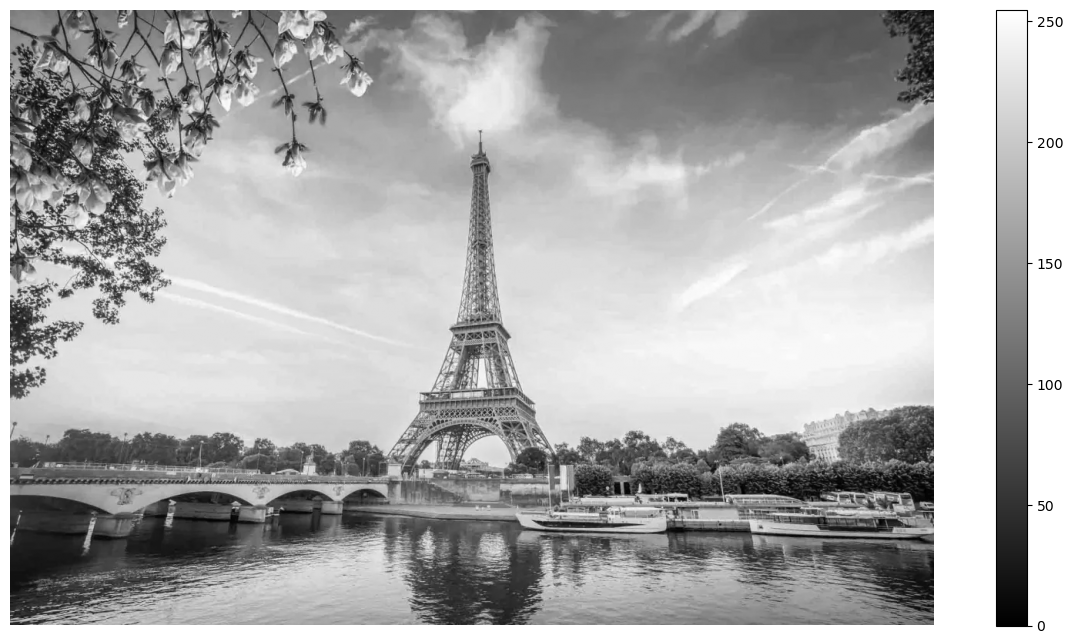

(800, 1200)

In [1]:
# Image Compression

import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]


A = img.imread(os.path.join("C:\\Users\\MANINDER\\Downloads\\paris image.webp")) # os.path.join('..',Data,'file_name') run code everywhere linux or window
X = np.mean(A, -1); # Convert RGB to grayscale

plt.imshow(X, cmap='gray')
plt.colorbar()
plt.axis('off') 
plt.show()
X.shape

### Reduced image size in different rank size 

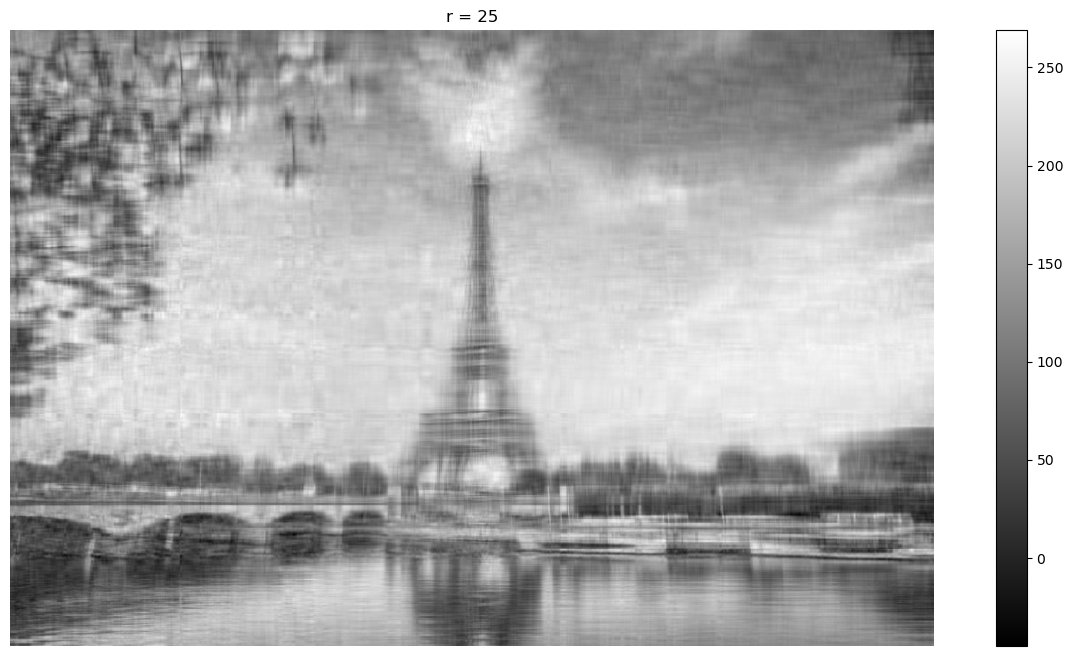

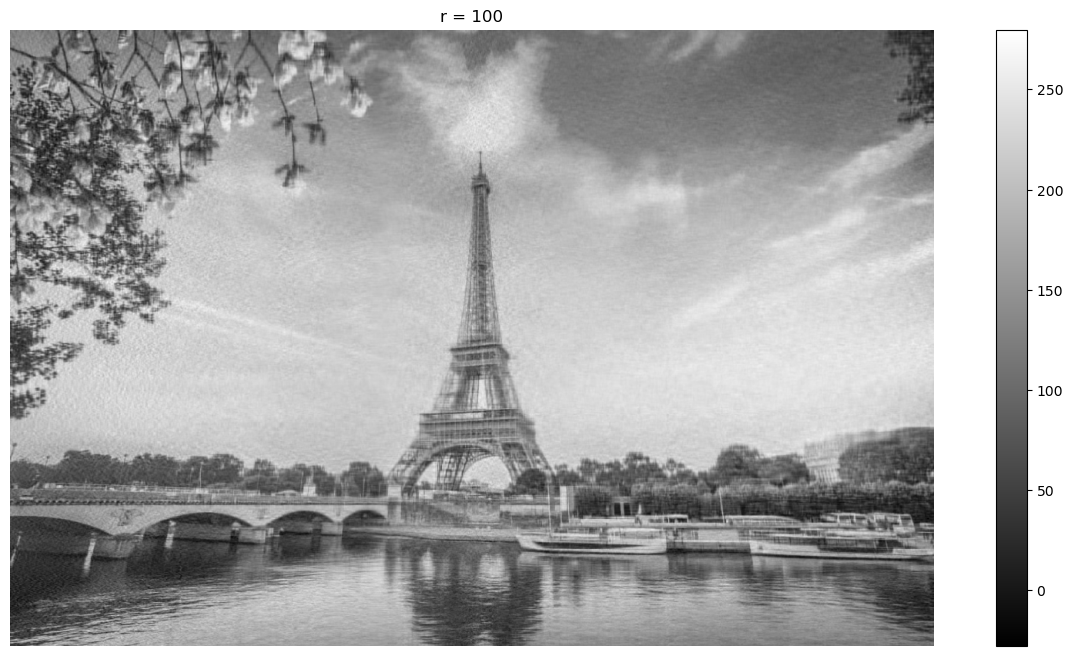

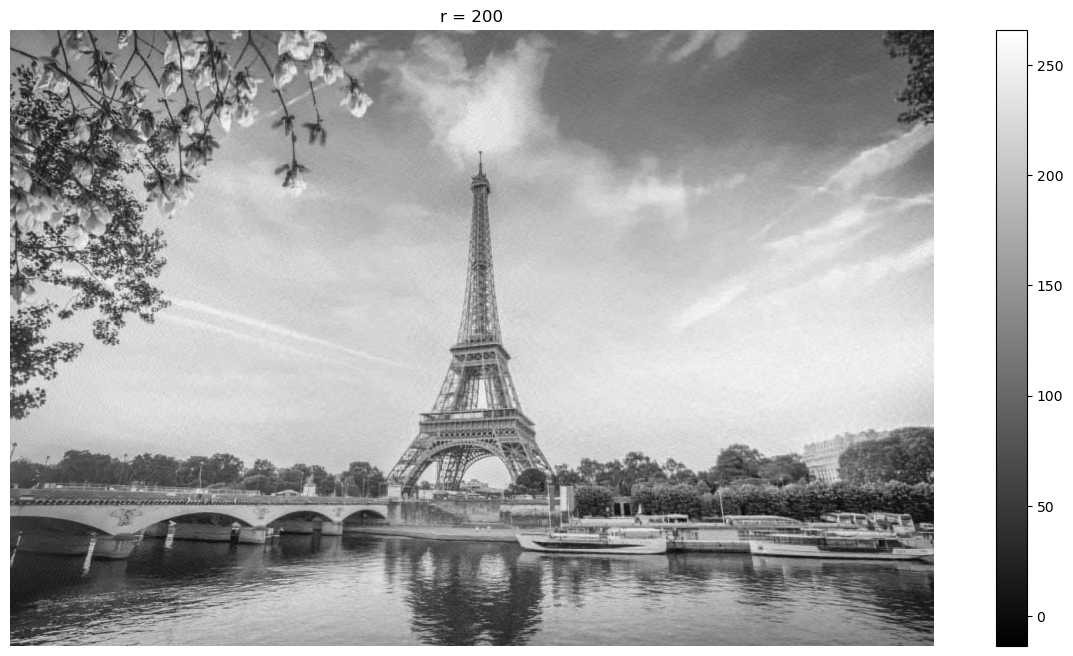

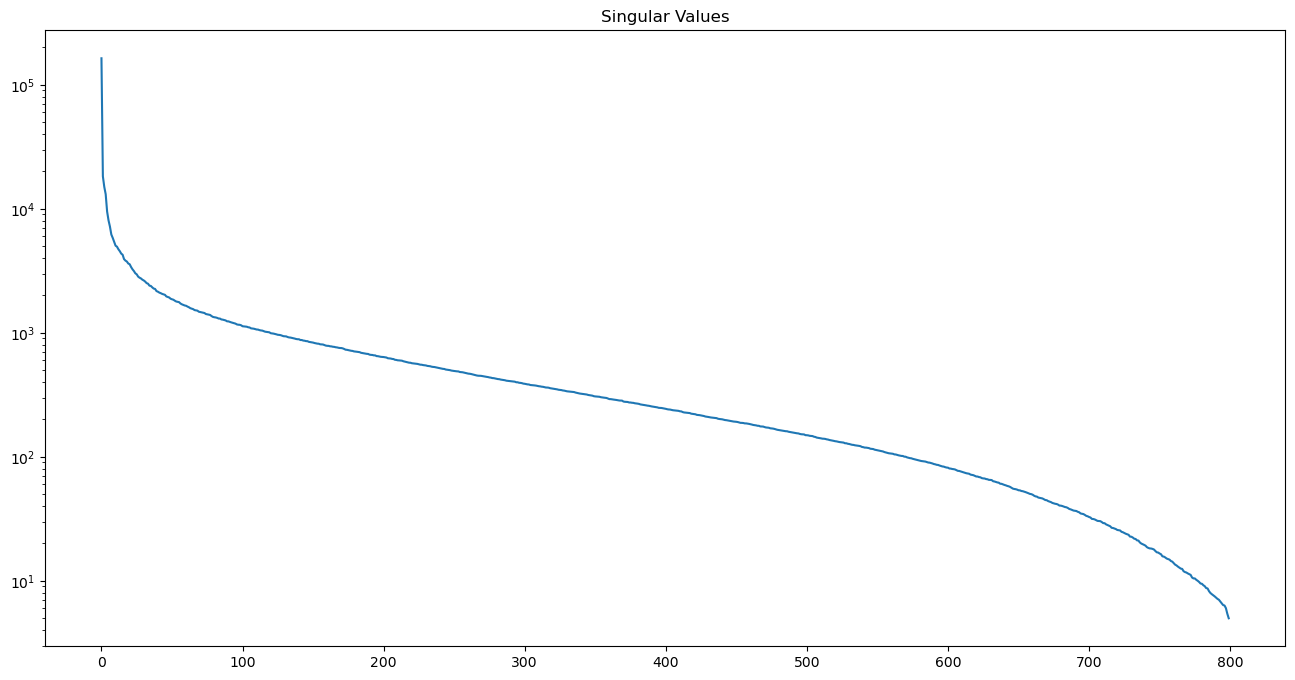

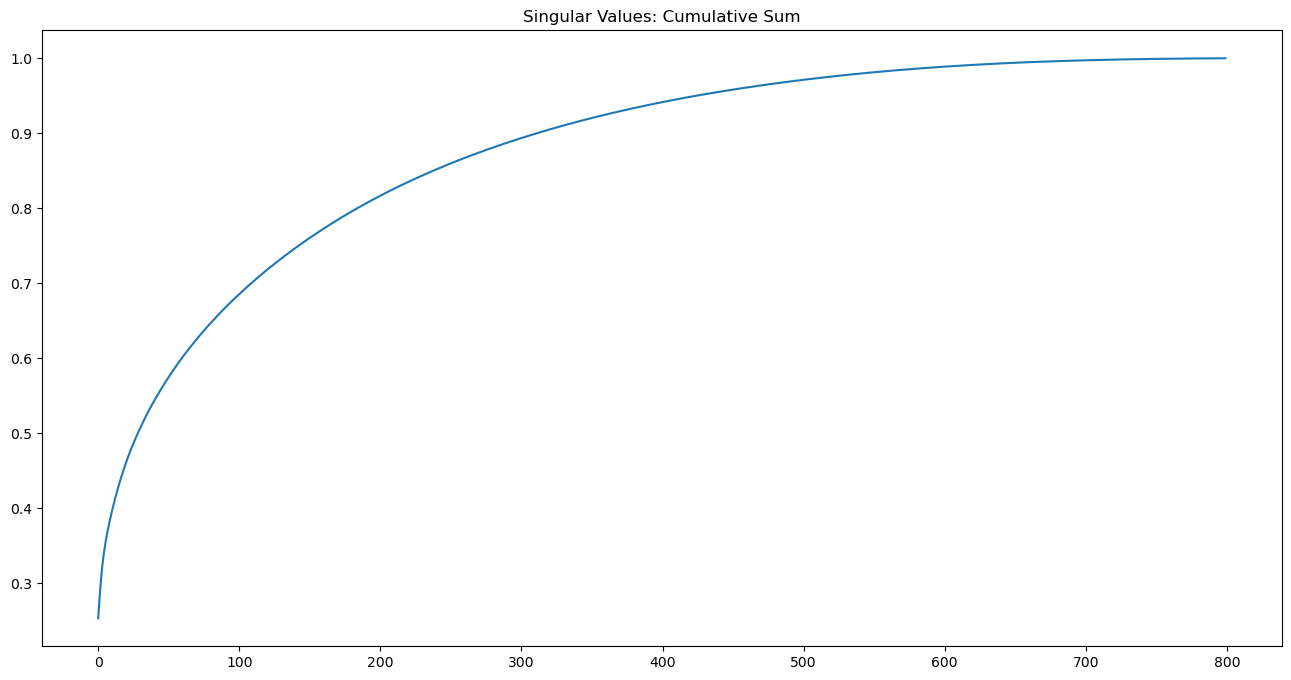

Chosen r = 424


In [2]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (25, 100, 200):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.colorbar()
    plt.show()

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
energy = (np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.plot(energy)
plt.title('Singular Values: Cumulative Sum')
plt.show()

r = np.argmax(energy >= 0.95)
print("Chosen r =", r)

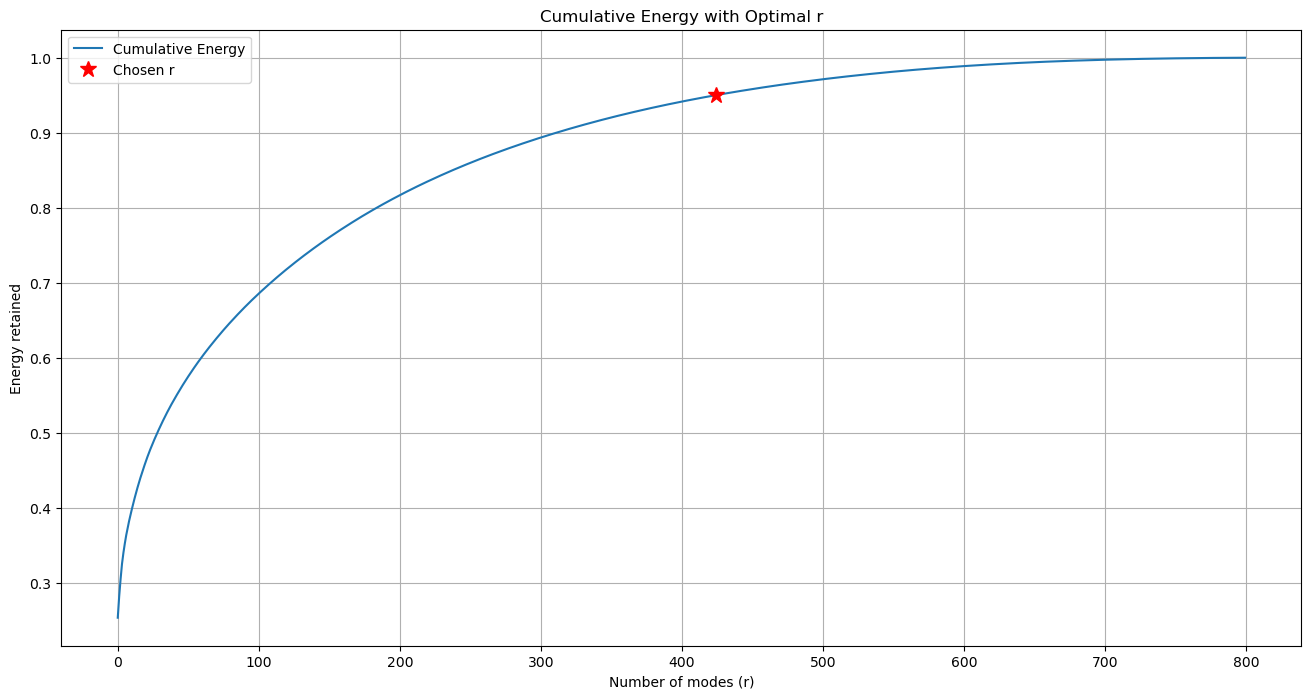

In [78]:
plt.figure()
plt.plot(energy, label='Cumulative Energy')

# Mark chosen r
plt.plot(r, energy[r], 'r*', markersize=12, label='Chosen r')

plt.xlabel('Number of modes (r)')
plt.ylabel('Energy retained')
plt.title('Cumulative Energy with Optimal r')
plt.legend()
plt.grid(True)
plt.show()

[[14232651.44444444 14289957.88888889 14225015.66666667 ...
  16871324.88888888 16991997.88888889 17225281.55555556]
 [14289957.88888889 14434162.         14409249.33333333 ...
  17056171.88888889 17175030.55555555 17407601.        ]
 [14225015.66666667 14409249.33333333 14505276.77777777 ...
  17187198.11111111 17263056.         17508644.44444445]
 ...
 [16871324.88888888 17056171.88888889 17187198.11111111 ...
  23731428.88888889 23550514.55555555 23559916.88888889]
 [16991997.88888889 17175030.55555555 17263056.         ...
  23550514.55555555 23929244.33333334 23880338.33333334]
 [17225281.55555556 17407601.         17508644.44444445 ...
  23559916.88888889 23880338.33333334 24315049.33333334]]


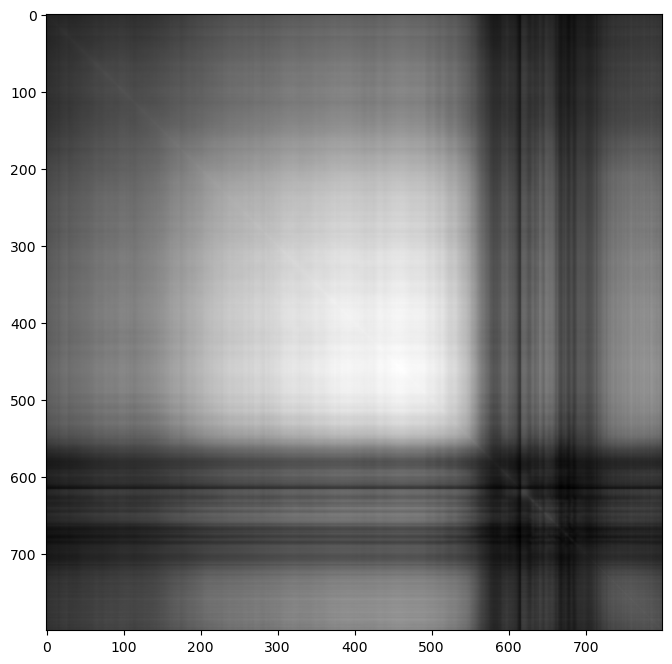

In [13]:
plt.figure(3)
correlation = np.dot(X,X.T)
print(correlation)
plt.imshow(correlation, cmap= 'gray')
plt.show()



[[11160117.66666666 10992299.11111111 10748064.88888889 ...
  11260832.11111111 11202529.         11143506.55555556]
 [10992299.11111111 11245614.66666667 11125895.66666667 ...
  11347803.55555556 11280681.11111111 11228807.33333333]
 [10748064.88888889 11125895.66666667 11385114.44444445 ...
  11314690.55555556 11242995.55555555 11199062.22222222]
 ...
 [11260832.11111111 11347803.55555556 11314690.55555556 ...
  18319825.77777777 18210444.99999999 18072367.99999999]
 [11202529.         11280681.11111111 11242995.55555555 ...
  18210444.99999999 18179717.44444444 18075278.88888888]
 [11143506.55555556 11228807.33333333 11199062.22222222 ...
  18072367.99999999 18075278.88888888 18065542.33333333]]


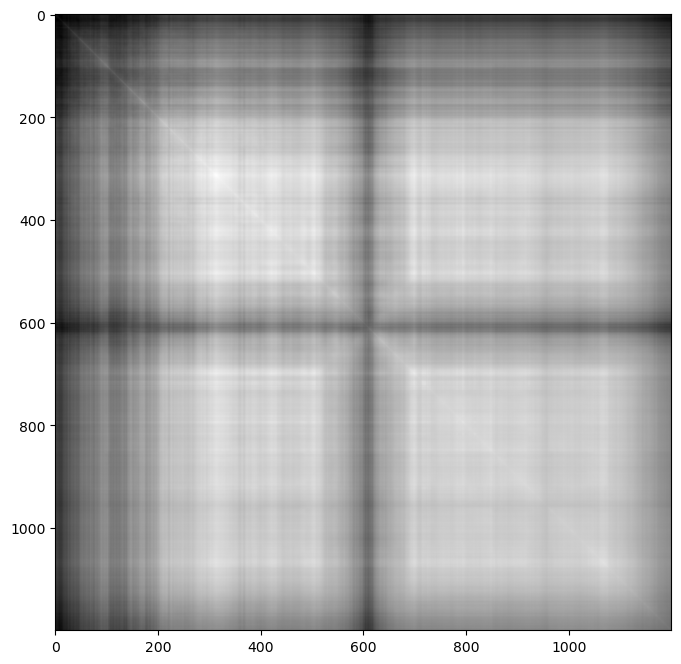

In [14]:
plt.figure(3)
correlation = np.dot(X.T,X)
print(correlation)
plt.imshow(correlation, cmap= 'gray')
plt.show()

# Method of Snapshots

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8] # rc means run command 
plt.rcParams.update({'font.size': 18})

theta = np.array([np.pi/15, -np.pi/9, -np.pi/20])
Sigma = np.diag([3, 1, 0.5]) # scale x, then y, then z

# Rotation about x axis
Rx = np.array([[1, 0, 0],
               [0, np.cos(theta[0]), -np.sin(theta[0])],
               [0, np.sin(theta[0]), np.cos(theta[0])]])

# Rotation about y axis
Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
               [0, 1, 0],
               [-np.sin(theta[1]), 0, np.cos(theta[1])]])

# Rotation about z axis
Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
               [np.sin(theta[2]), np.cos(theta[2]), 0],
               [0, 0, 1]])

# Rotate and scale
X = Rz @ Ry @ Rx @ Sigma

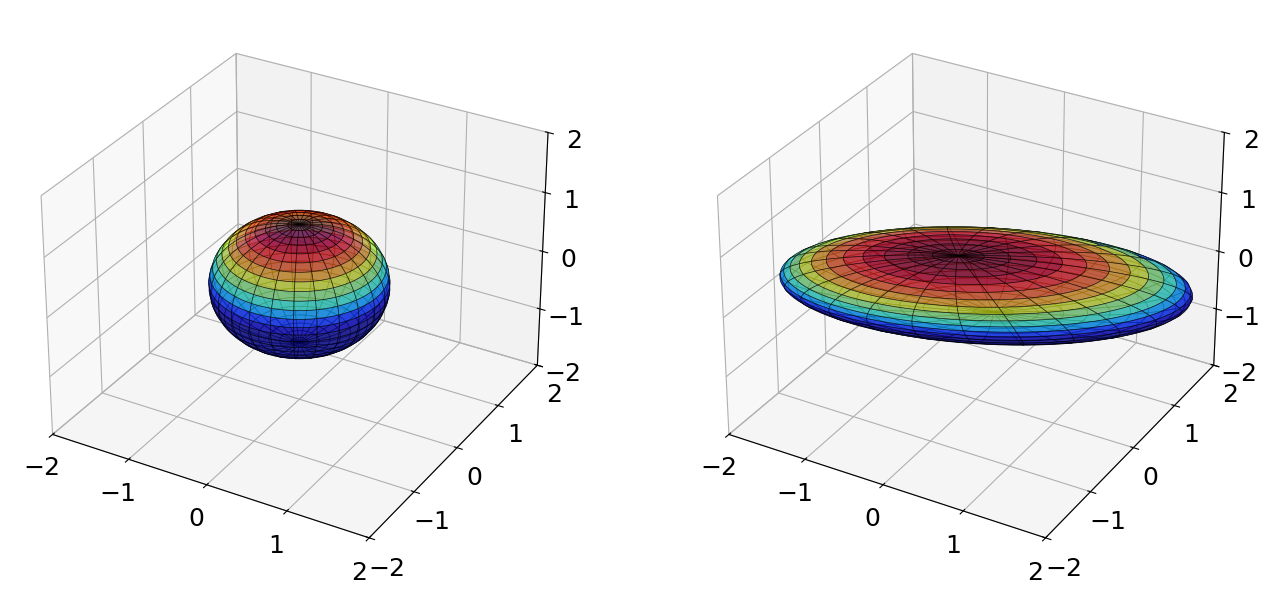

In [19]:
# Plot sphere
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
surf1 = ax1.plot_surface(x, y, z, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),linewidth=0.5,rcount=30,ccount=30)
surf1.set_edgecolor('k')
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]
        
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet',alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(z),rcount=30,ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)
plt.show()

## pseudo inverse, least square
##### inv(A) = V*inv(sigma(S))*tranpsoe(U)
##### x = inv(A)*b


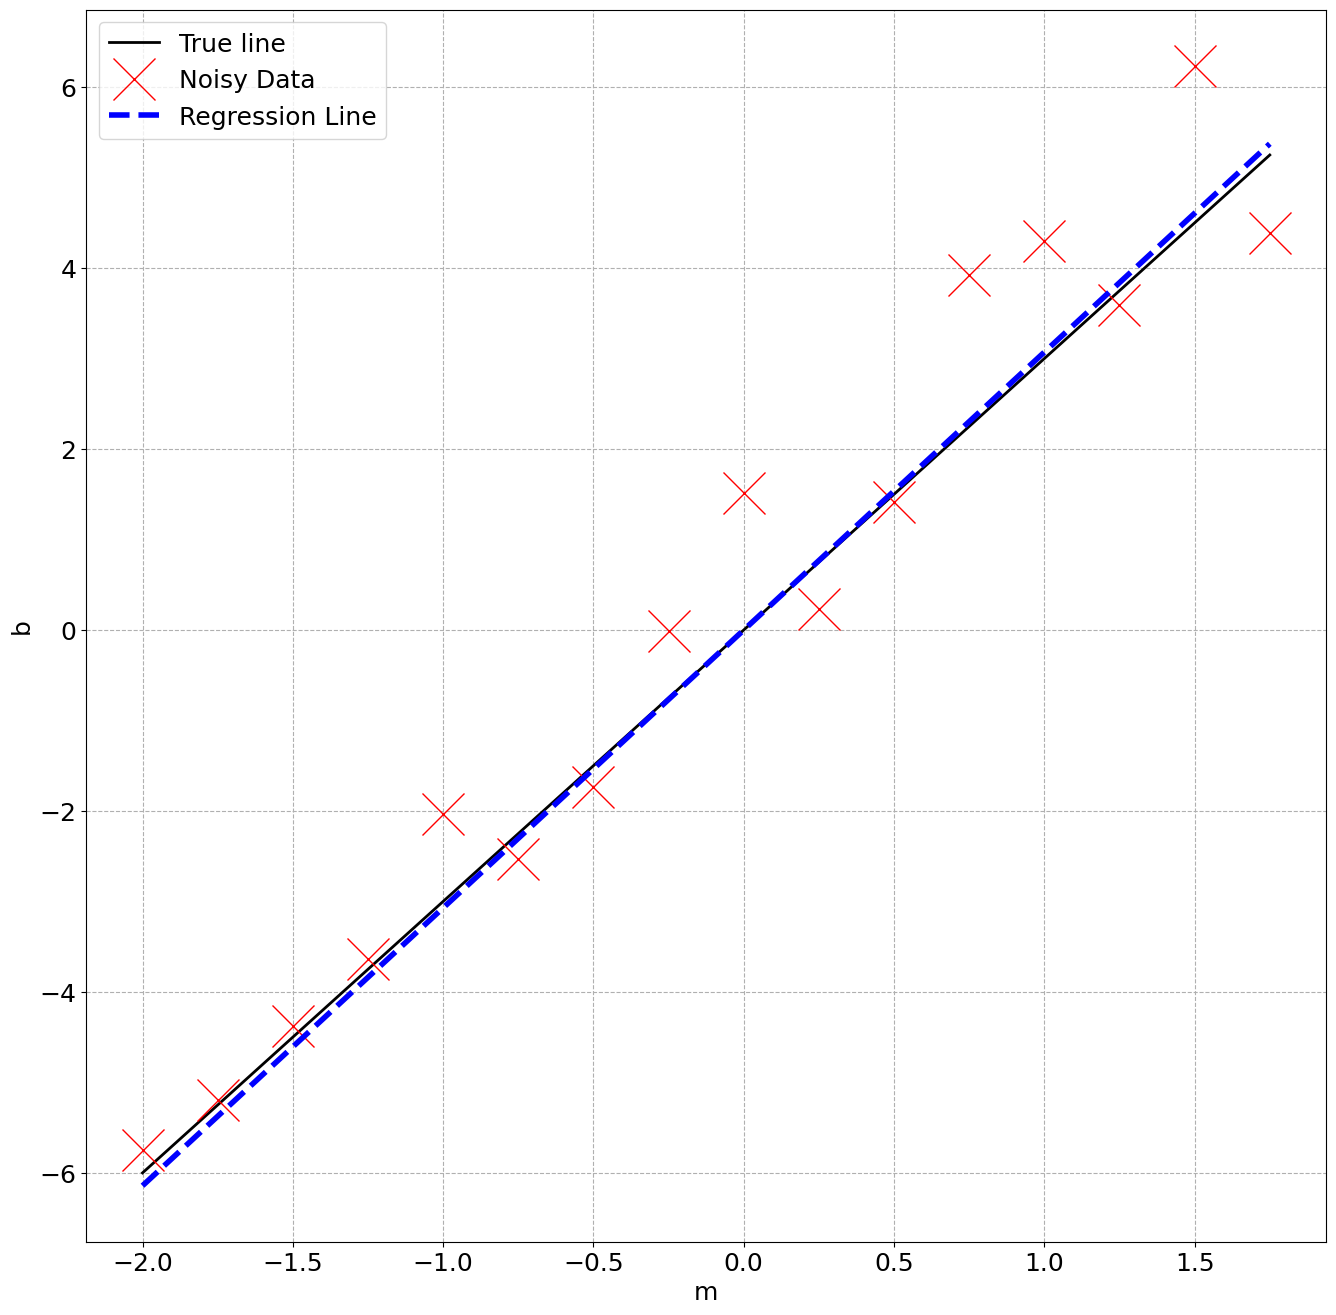

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16,16]
plt.rcParams.update({'font.size': 18})
x = 3 #true data
m = np.arange(-2,2,0.25)
m = m.reshape(-1,1)
b = m*x + np.random.randn(m.shape[0],1) # noisy data
plt.plot(m, m*x,  'k', linewidth = 2, label = 'True line')
plt.plot(m, b, 'x', color ='r' , markersize = 30, label = 'Noisy Data') 

U,S,VT = np.linalg.svd(m, full_matrices = False)
xtilda = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
plt.plot(m, xtilda*m,'--', color = "b", linewidth = 4, label = "Regression Line")
plt.xlabel('m')
plt.ylabel('b')
plt.grid(linestyle = '--')
plt.legend()
plt.show()         
